In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
auto_price = pd.read_csv('/content/Automobile_price_data__Raw_.csv')
auto_price.head()   # To display first 5 rows

##### 1. Handling Missing Values

In [ ]:
auto_price.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
# replace '?' (question mark) by null value
auto_price.replace('?', np.nan, inplace = True)

In [ ]:
auto_price.isnull().sum()

In [ ]:
auto_price.dtypes    # dtypes shows data types of each columns

In [ ]:
# Convert Object columns to Numerical columns
cols = ['normalized-losses','bore','stroke','horsepower','peak-rpm','price']
auto_price[cols] = auto_price[cols].apply(pd.to_numeric)

In [ ]:
auto_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

##### 1. Methods to handle missing data
    * Replace by central tendancy. For numerical data replace by mean or median. for categorical data replace by mode.
    * Imputation - SimpleImputation
    * fillna() - Fill missing value by central tendancy.
    * ffill()/bfill() - Should be used mostly in time series data.
    * dropna() - Drop rows with missing data.


In [ ]:
auto_price['normalized-losses'].replace(np.nan, auto_price['normalized-losses'].mean(), inplace = True)

In [ ]:
auto_price['price'].fillna(np.round(auto_price['price'].mean()), inplace = True)

In [ ]:
np.round(auto_price['price'].mean())

13207.0

##### Dropna()
    * It drops data rows with missing entries in any column.

In [ ]:
auto_price.isnull().sum()

In [ ]:
auto_price.dropna(inplace = True)

##### Read Diabetes Dataset

In [ ]:
diabetes = pd.read_csv('/content/Diabetes_Preprocessing.csv')
diabetes.head()

In [ ]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

###### Imputation
    * It is a technique used for replacing multiple missing data with suitable value for most/multiple selected data columns.

In [ ]:
from sklearn.impute import SimpleImputer
# replace multiple missing data by respective strategy = mean, median or most_frequent
impute = SimpleImputer(strategy = 'median')

In [ ]:
data_array = impute.fit_transform(diabetes)

In [ ]:
diabetes_df1 = pd.DataFrame(data_array, columns = diabetes.columns)

In [ ]:
diabetes_df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### Outliers
  * There are two definitions:

    a) Using Boxplot
     
    b) Using z-score.

In [ ]:
from scipy import stats

In [ ]:
auto_price_numerical = auto_price.select_dtypes(['int64','float64'])
# apply z-transformation on all columns
z_score = stats.zscore(auto_price_numerical)

In [ ]:
# np.where() = returns rows & column indexes with outliers
np.where((z_score > 3) | (z_score < -3))

(array([ 16,  18,  18,  29,  29,  46,  47,  48,  48,  60,  67,  67,  67,
         68,  68,  84, 100, 105, 107, 123, 126, 150, 151, 157, 158, 166,
        174, 176, 179, 182, 184, 195]),
 array([15, 13, 14, 13, 14,  7,  7,  7, 11, 10,  2,  7, 15,  7, 15, 13,  1,
         9,  9, 11,  9, 10, 10, 12, 12, 10, 10, 10, 10,  1, 10, 10]))

##### Finding outliers using boxplot method.

<Axes: >

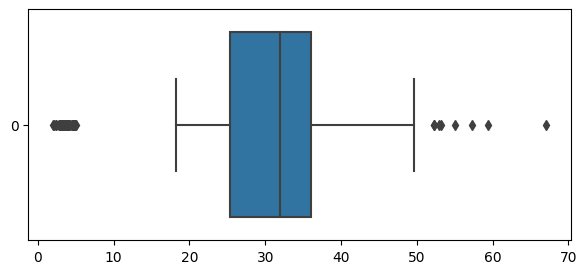

In [ ]:
plt.figure(figsize = (7,3))
sns.boxplot(diabetes['BMI'], orient = 'h')

In [ ]:
q1 = diabetes['BMI'].quantile(.25)   # calculate first quartile
q3 = diabetes['BMI'].quantile(.75)   # calculate third quartile

In [ ]:
def find_outliers(df, cols):
    q1 = df[cols].quantile(.25)
    q3 = df[cols].quantile(.75)
    iqr = q3 - q1   # calculate inter quartile range
    min_r = q1 - 1.5 * iqr
    max_r = q3 + 1.5 * iqr
    outlier_indexes = df.index[(df[cols] < min_r) | (df[cols] > max_r)]
    return outlier_indexes

In [ ]:
find_outliers(auto_price, 'price')   # return outliers row indexes for dataframe = 'auto_price' and columns = 'price'

Int64Index([15, 16, 17, 47, 48, 49, 70, 71, 72, 73, 74, 126, 127, 128], dtype='int64')

#### Treating Outliers
    * Remove/Trim the Outliers
    * Replace Outliers by Mean/Median

###### Data Pre-Processing
  
    * Data Scaling
    * Categorical to Numerical - Label Encoding, One-Hot Encoding

In [ ]:
auto_price['num-of-doors'].unique()   # method to implement label encoder

array(['two', 'four'], dtype=object)

In [ ]:
# label encoder which will map categorical values in alphabetical order to 0,1,2,3,4,5
from sklearn.preprocessing import LabelEncoder
le_encode = LabelEncoder()
auto_price['num-of-doors'] = le_encode.fit_transform(auto_price['num-of-doors'])

In [ ]:
pd.get_dummies(auto_price['body-style'])

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
200,0,0,0,1,0
201,0,0,0,1,0
202,0,0,0,1,0
203,0,0,0,1,0
